# eCall Transport

## 


In [27]:
# Install a conda package in the current Jupyter kernel
import sys
!pip install asn1tools-0.146.6-py2.py3-none-any.whl

Processing ./asn1tools-0.146.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ee/cc/d992e1d886d5ce15d2622c2e89b6de52b48312c6f05e34b7ee881b4ccb02/diskcache-4.1.0-py2.py3-none-any.whl
Processing ./.cache/pip/wheels/5b/c3/e5/27b8d419b20cd587df1ccf36cd7f7ca79486185e87085cec13/bitstruct-8.9.0-cp37-cp37m-linux_x86_64.whl


## eCall Message Analyzer

Generation einer MSD Message PDU (Package Data Unit)

015C0681D54970D65C3597CA0420C41464583ADE68AC52E9BB8413F149C07414FB414F6010180813E82181823230


# ASN.1 Coding

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../modules'))


import asn1tools
foo = asn1tools.compile_files('data/foo.asn', codec='ber')
encoded = foo.encode('Question', {'id': 1, 'question': 'Is 1+1=3?'})
print(encoded)
encoded = foo.encode('Answer', {'id': 2, 'answer': False})
print(encoded)


bytearray(b'0\x0e\x02\x01\x01\x16\tIs 1+1=3?')
bytearray(b'0\x06\x02\x01\x02\x01\x01\x00')


In [3]:
#bytes = '\xf0\x0f'
bytes = encoded
bytes_as_bits = ''.join(format(byte, '08b') for byte in bytes)

print (bytes_as_bits)

0011000000000110000000100000000100000010000000010000000100000000


In [4]:
import binascii
binascii.hexlify(bytearray(encoded))

b'3006020102010100'

In [5]:
msdMessage = {'msdStructure' : {
		'messageIdentifier': 1,
		'control': {
			'automaticActivation': True,
			'testCall' : False,
			'positionCanBeTrusted' :  True,
			'vehicleType' : 'passengerVehicleClassM1'
		},
		'vehicleIdentificationNumber' : {
			'isowmi': 'ECA',
			'isovds': 'LLEXAM',
			'isovisModelyear': 'P',
			'isovisSeqPlant' : 'LE02013'
		},
		'vehiclePropulsionStorageType' : {
			'gasolineTankPresent' : True,
			'dieselTankPresent' : False,
			'compressedNaturalGas' : False,
			'liquidPropaneGas' : False,
			'electricEnergyStorage' : False,
			'hydrogenStorage' : False,
			'otherStorage' : False
		},
		'timestamp' : 1367878452,
		'vehicleLocation' : { 
			'positionLatitude' : 18859320,
			'positionLongitude': 187996428
		},
		'vehicleDirection' :  45,
		'recentVehicleLocationN1': {
			'latitudeDelta' :  0,
			'longitudeDelta': 10
		},
		'recentVehicleLocationN2' : {
			'latitudeDelta' : 0,
			'longitudeDelta' : 30
		},
		'numberOfPassengers' : 2
	}
 }
print(msdMessage)

{'msdStructure': {'messageIdentifier': 1, 'control': {'automaticActivation': True, 'testCall': False, 'positionCanBeTrusted': True, 'vehicleType': 'passengerVehicleClassM1'}, 'vehicleIdentificationNumber': {'isowmi': 'ECA', 'isovds': 'LLEXAM', 'isovisModelyear': 'P', 'isovisSeqPlant': 'LE02013'}, 'vehiclePropulsionStorageType': {'gasolineTankPresent': True, 'dieselTankPresent': False, 'compressedNaturalGas': False, 'liquidPropaneGas': False, 'electricEnergyStorage': False, 'hydrogenStorage': False, 'otherStorage': False}, 'timestamp': 1367878452, 'vehicleLocation': {'positionLatitude': 18859320, 'positionLongitude': 187996428}, 'vehicleDirection': 45, 'recentVehicleLocationN1': {'latitudeDelta': 0, 'longitudeDelta': 10}, 'recentVehicleLocationN2': {'latitudeDelta': 0, 'longitudeDelta': 30}, 'numberOfPassengers': 2}}


Mögliche Codecs sind 'ber', 'der', 'gser', 'jer', oer, 'per', 'uper' and 'xer'.

In [6]:
import binascii
import asn1tools
msd = asn1tools.compile_files('data/msd_v2.asn1', codec='uper')
msdcode = msd.encode('MSDMessage', msdMessage)
msdcode

bytearray(b'\x1c\x06\x80\xe3\nQC\x9e)U\xd48\x00\x80\x044\n\x8cAY\xa4\x08\xfe)\xc4Y\xa4\xc8al\x01\x05@\x10\xf0\x10')

In [7]:
#msdcode = b'0'
eCallMessage = { 
  'msdVersion':  2,
  'msd' : (msdcode)
}
print(eCallMessage)

{'msdVersion': 2, 'msd': bytearray(b'\x1c\x06\x80\xe3\nQC\x9e)U\xd48\x00\x80\x044\n\x8cAY\xa4\x08\xfe)\xc4Y\xa4\xc8al\x01\x05@\x10\xf0\x10')}


In [8]:
code = msd.encode('ECallMessage', eCallMessage)
print(code)

bytearray(b'\x02$\x1c\x06\x80\xe3\nQC\x9e)U\xd48\x00\x80\x044\n\x8cAY\xa4\x08\xfe)\xc4Y\xa4\xc8al\x01\x05@\x10\xf0\x10')


In [9]:
import binascii
hexcode = binascii.hexlify(bytearray(code))
print(hexcode)
print( "Länge des Oct String = " + str(len(code)) ) 


b'02241c0680e30a51439e2955d438008004340a8c4159a408fe29c459a4c8616c01054010f010'
Länge des Oct String = 38


In [10]:
result = msd.decode('ECallMessage', code)
print(result)

{'msdVersion': 2, 'msd': b'\x1c\x06\x80\xe3\nQC\x9e)U\xd48\x00\x80\x044\n\x8cAY\xa4\x08\xfe)\xc4Y\xa4\xc8al\x01\x05@\x10\xf0\x10'}


In [11]:
msd.decode('MSDMessage', result['msd'])

{'msdStructure': {'messageIdentifier': 1,
  'control': {'automaticActivation': True,
   'testCall': False,
   'positionCanBeTrusted': True,
   'vehicleType': 'passengerVehicleClassM1'},
  'vehicleIdentificationNumber': {'isowmi': 'ECA',
   'isovds': 'LLEXAM',
   'isovisModelyear': 'P',
   'isovisSeqPlant': 'LE02013'},
  'vehiclePropulsionStorageType': {'gasolineTankPresent': True,
   'dieselTankPresent': False,
   'compressedNaturalGas': False,
   'liquidPropaneGas': False,
   'electricEnergyStorage': False,
   'hydrogenStorage': False,
   'otherStorage': False},
  'timestamp': 1367878452,
  'vehicleLocation': {'positionLatitude': 18859320,
   'positionLongitude': 187996428},
  'vehicleDirection': 45,
  'recentVehicleLocationN1': {'latitudeDelta': 0, 'longitudeDelta': 10},
  'recentVehicleLocationN2': {'latitudeDelta': 0, 'longitudeDelta': 30},
  'numberOfPassengers': 2}}

http://www.auto-vin-decoder.com/
Gültiger VIN-Code : WVWZZZ1JZ3W386752

Gültige PDU Message mit VW Golf / Golf IV Cabrio / Bora / Jetta / Bora Variant - MK4 / R32, 2003,Wolfsburg, Germany, Serial 386752) 

PDU(46octets):015C06B1D71D8208014A00DD0C81871424583ADE68AC52E9BB8413F149C07414FB414F6010180813E82181823230

In [12]:
eCallMessage = b'015C06B1D71D8208014A00DD0C81871424583ADE68AC52E9BB8413F149C07414FB414F6010180813E82181823230'

In [13]:
print (eCallMessage)
result = msd.decode('ECallMessage', eCallMessage)
print(result)

b'015C06B1D71D8208014A00DD0C81871424583ADE68AC52E9BB8413F149C07414FB414F6010180813E82181823230'
{'msdVersion': 48, 'msd': b'5C06B1D71D8208014A00DD0C81871424583ADE68AC52E9BB8'}


In [14]:
msd.decode('MSDMessage', result['msd'])

DecodeError: msdStructure: vehicleIdentificationNumber: isovds: Expected a value in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], but got 55.

# PCM (Puls Code Modulation)


Das Minimal Set of Data wird als PCM File im Spachkanal einer 2G oder 3G Verbindung übertragen. Im folgenden Abschnitt wurde mit dem ETSI TS xxx C-Code ein PCM File genereiert. 

[     0.  11077.  20849.  28167.  32169.  32384.  28785.  21798.  12245.
   1250.  -9893. -19870. -27508. -31908. -32551. -29361. -22715. -13395.
  -2497.   8694.  18862.  26809.  31600.  32671.  29895.  23599.  14526.
   3742.  -7483. -17826.]


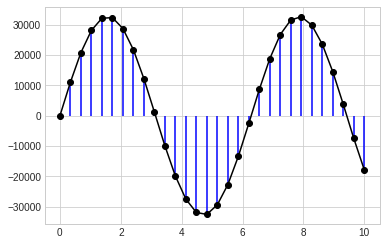

In [3]:

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x = np.linspace(0, 10, 30)
y =  np.rint(np.sin(x)*32768) 

# Draw sampling lines (PCM, pulse code modulation)
for xc in x:
    plt.vlines(x=xc, ymin=-1, ymax=np.sin(xc)*32768, color='blue')


#plt.plot(x, y, 'o', color='black');
plt.plot(x, y, '-ok');

print(y)

## PCM ROM Tables

[     0   7654  14142  18478  20000  18478  14142   7654      0  -7654
 -14142 -18478 -20000 -18478 -14142  -7654      0   7654  14142  18478
  20000  18478  14142   7654      0  -7654 -14142 -18478 -20000 -18478
 -14142  -7654      0   7654  14142  18478  20000  18478  14142   7654
      0  -7654 -14142 -18478 -20000 -18478 -14142  -7654      0   7654
  14142  18478  20000  18478  14142   7654      0  -7654 -14142 -18478
 -20000 -18478 -14142  -7654]


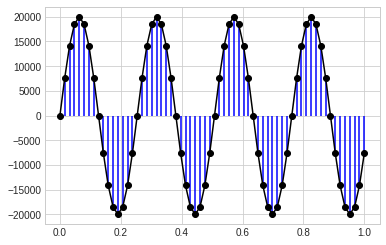

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Länge 4ms : Toral 16 * 4ms = 64ms 
wakeupSin500_int16 = [0, 7654,  14142,  18478,  20000,  18478,  14142,  7654,
  0, -7654, -14142, -18478, -20000, -18478, -14142, -7654]



x = np.linspace(0, 1, 16)
y = wakeupSin500_int16


sync = np.tile(wakeupSin500_int16,4)
print (sync)
x =  np.linspace(0, 1, 16*4)
y= sync

plt.plot(x, y, '-ok');
cc=0
for xc in x:
    plt.vlines(x=xc, ymin=0, ymax=y[cc], color='blue')
    cc +=1
    

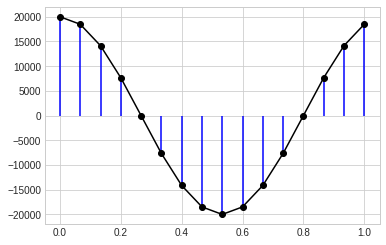

In [14]:
Int16_wakeupCos500 =[20000,  18478,  14142,  7654,  0, -7654, -14142, -18478,
  -20000, -18478, -14142, -7654, 0, 7654,  14142,  18478]
y=Int16_wakeupCos500
plt.plot(x, y, '-ok');
cc=0
for xc in x:
    plt.vlines(x=xc, ymin=0, ymax=y[cc], color='blue')
    cc +=1

Synchronisation Preamble is eine Pulse Sequenz der Länge 15, welche dem Empfänger bekannt ist. Die Puls Sequnez besteht aus 5 Perioden. Die Rand-Perioden 1 und 5 sind invertiert.

[ 1  1  1  1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1]
start sequenz
[-1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1]
siehe Fig 10: page (17) ----
[-20000, -20000, -20000, -20000, 20000, -20000, 20000, -20000, -20000, 20000, 20000, -20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, -20000, 20000, -20000, 20000, 20000, -20000, -20000, 20000, -20000, -20000, -20000, 20000, 20000, 20000, 20000, -20000, 20000, -20000, 20000, 20000, -20000, -20000, 20000, -20000, -20000, -20000, 20000, 20000, 20000, 20000, -20000, 20000, -20000, 20000, 20000, -20000, -20000, 20000, -20000, -20000, -20000, -20000, -20000, -20000, -20000, 20000, -20000, 20000, -20000, -20000, 20000, 20000, -20000, 20000, 20000, 20000]


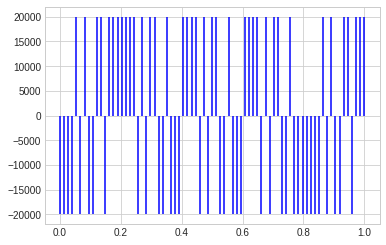

In [66]:
Int16_syncSequence = np.array([1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1]) 

start = stop = np.array([x * -1 for x in  Int16_syncSequence ]) 
print (Int16_syncSequence)

print ("start sequenz")
print (start)

puls_sequence_for_sync_preample = np.concatenate((start, np.tile(Int16_syncSequence,3), stop))

puls_sequence_for_sync_preample

print ("siehe Fig 10: page (17) ----")
x =  np.linspace(0, 1, 15 * 5)
y= [x*20000 for x in puls_sequence_for_sync_preample]
print(y)
cc=0
for xc in x:
    plt.vlines(x=xc, ymin=0, ymax=y[cc], color='blue')
    cc +=1

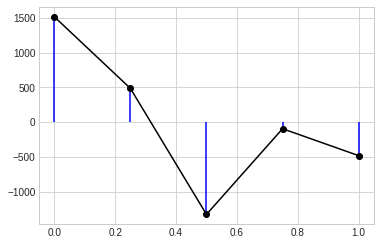

In [61]:
 
Int16_syncPulseForm= [1515, 485, -1327, -95, -482]
x = np.linspace(0, 1, 5)
y=Int16_syncPulseForm
plt.plot(x, y, '-ok');
cc=0
for xc in x:
    plt.vlines(x=xc, ymin=0, ymax=y[cc], color='blue')
    cc +=1

# PPM (Pulse Pausen Modulation)

Basic Uplink Waveform p_UL(n) für den FastModulator n=0,..,15 16 /8000 = 2ms.

1 Sprach Frame enthält 10 Modulations-Frames -> mit 10 Symbolen a 3Bit (Wert 0-7)

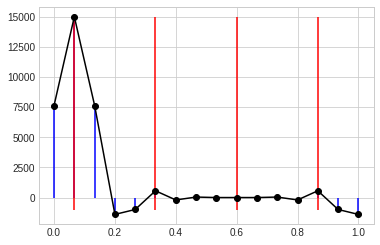

In [13]:
Int16_m4smp_ulPulse= [0,     0,     0,     40,    -200,  560,  -991,   -1400,
  7636,  15000, 7636,  -1400, -991,  560,  -200,   40]
x = np.linspace(0, 1, 16)
shift = [ 0, 4, 8 ,12 ]
y=np.roll(Int16_m4smp_ulPulse,8)
plt.plot(x, y, '-ok');
cc=0
for xc in x:
    plt.vlines(x=xc, ymin=0, ymax=y[cc], color='blue')
    cc +=1
plt.vlines(x=1/15, ymin=-1000, ymax=15000, color='red')
plt.vlines(x=5/15, ymin=-1000, ymax=15000, color='red')
plt.vlines(x=9/15, ymin=-1000, ymax=15000, color='red')
plt.vlines(x=13/15, ymin=-1000, ymax=15000, color='red')

Shift right array 

[0, 0, 0, 40, -200, 560, -991, -1400, 7636, 15000, 7636, -1400, -991, 560, -200, 40]


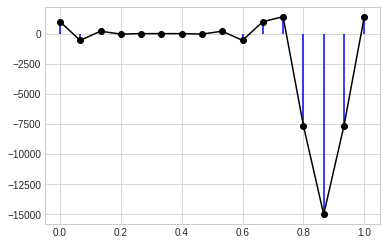

In [11]:
import numpy as np
print (Int16_m4smp_ulPulse)
x = np.linspace(0, 1, 16)
y=-1 * np.roll(Int16_m4smp_ulPulse,4)
plt.plot(x, y, '-ok');
cc=0
for xc in x:
    plt.vlines(x=xc, ymin=0, ymax=y[cc], color='blue')
    cc +=1

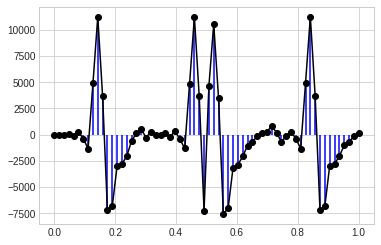

In [24]:
Int16_m4smp_ulPulseMatch = [0,     0,     0,     23,    -113,  279,   -387,  -1336,
  4892,  11262, 3665,  -7236, -6829, -3000, -2790, -2050,
  -599,  147,   513,   -274,  282,   -8,    6,     111,
  -182,  349,   -446,  -1309, 4858,  11260, 3647,  -7250,
  4625,  10568, 3481,  -7619, -6964, -3158, -2870, -2083,
  -1047, -695,  -130,  176,   263,   826,   205,   -685,
  -120,  300,   -385,  -1329, 4897,  11264, 3668,  -7237,
  -6826, -3000, -2790, -2052, -1023, -723,  -146,  129]

x = np.linspace(0, 1, 64)
y=Int16_m4smp_ulPulseMatch
plt.plot(x, y, '-ok');
cc=0
for xc in x:
    plt.vlines(x=xc, ymin=0, ymax=y[cc], color='blue')
    cc +=1

Robust modulator mode p_ul(n) mit n=0,..,31 mit einer Rate von 8000 Samples pro Sekunde 32/8000 = 4ms pro Frame werden für den Downlink verwendet. 

Codierung von 16 Symbols mit cyclic shift k = [0,4,8,12,16,20,24,28] 

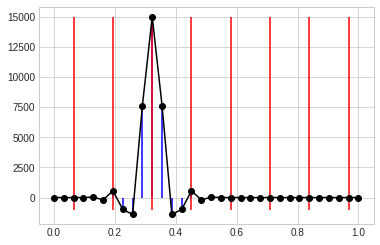

In [25]:
Int16_m8smp_dlPulse = [   40,    -200,  560,
  -991,  -1400, 7636,  15000, 7636,  -1400, -991,  560,
  -200,  40,    0,     0,     0,     0,     0,     0,
  0,     0,     0,     0,     0,     0,     0,     0 , 0,     0,     0,     0,     0  ]

x = np.linspace(0, 1, 32)
shift=[0,4,8,12,16,20,24,28]

y=np.roll(Int16_m8smp_dlPulse,4)
plt.plot(x, y, '-ok');
cc=0
for xc in x:
    plt.vlines(x=xc, ymin=0, ymax=y[cc], color='blue')
    cc +=1
    
plt.vlines(x=2/31, ymin=-1000, ymax=15000, color='red')
plt.vlines(x=6/31, ymin=-1000, ymax=15000, color='red')
plt.vlines(x=10/31, ymin=-1000, ymax=15000, color='red')
plt.vlines(x=14/31, ymin=-1000, ymax=15000, color='red')
plt.vlines(x=18/31, ymin=-1000, ymax=15000, color='red')
plt.vlines(x=22/31, ymin=-1000, ymax=15000, color='red')
plt.vlines(x=26/31, ymin=-1000, ymax=15000, color='red')
plt.vlines(x=30/31, ymin=-1000, ymax=15000, color='red')

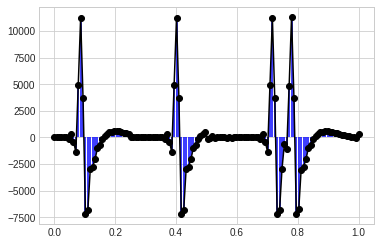

In [26]:
Int16_m8smp_ulPulseMatch = [0,     0,     0,     0,     0,     23,    -113,  279,
  -387,  -1336, 4892,  11262, 3665,  -7236, -6829, -3000,
  -2790, -2050, -1022, -722,  -145,  105,   339,   499,
  548,   609,   576,   563,   500,   448,   381,   317,
  0,     0,     0,     0,     0,     0,     0,     0,
  0,     0,     0,     0,     0,     23,    -113,  279,
  -387,  -1336, 4892,  11262, 3665,  -7236, -6829, -3000,
  -2790, -2050, -1022, -722,  -145,  105,   339,   499,
  -120,  -15,   113,   -14,   36,    15,    1,     16,
  -8,    8,     -7,    2,     -4,    -2,    -2,    -3,
  -2,    -2,    -1,    -2,    -1,    22,    -114,  278,
  -387,  -1337, 4892,  11262, 3665,  -7236, -6828, -2999,
  -599,  -1039, 4880,  11349, 3725,  -7236, -6770, -3020,
  -2760, -2068, -1016, -733,  -152,  97,    329,   492,
  539,   603,   569,   558,   496,   445,   378,   315,
  256,   199,   151,   107,   72,    67,    -91,   283]

x = np.linspace(0, 1, 128)
y=Int16_m8smp_ulPulseMatch
plt.plot(x, y, '-ok');
cc=0
for xc in x:
    plt.vlines(x=xc, ymin=0, ymax=y[cc], color='blue')
    cc +=1


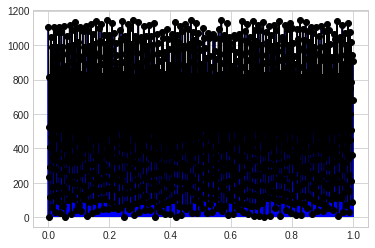

In [36]:
Ord16_interleaverSeq = [1102, 522,  812,  232,  0,    116,  290,
  406,  696,  1044, 580,  464,  754,  986,
  174,  58,   928,  348,  870,  638,  1103,
  531,  853,  281,  32,   129,  336,  460,
  734,  1077, 597,  515,  777,  987,  181,
  97,   977,  370,  925,  648,  1105, 562,
  864,  253,  26,   134,  315,  421,  741,
  1078, 608,  512,  798,  989,  178,  64,
  949,  404,  878,  640,  1109, 577,  854,
  269,  5,    145,  331,  459,  719,  1053,
  629,  474,  771,  993,  213,  101,  965,
  360,  901,  670,  1117, 550,  847,  243,
  20,   122,  316,  425,  746,  1088, 594,
  504,  772,  1001, 198,  106,  939,  351,
  891,  646,  1133, 575,  848,  241,  43,
  154,  319,  443,  737,  1098, 613,  471,
  796,  1017, 196,  70,   937,  380,  921,
  677,  1106, 530,  831,  259,  35,   130,
  342,  430,  740,  1084, 601,  466,  782,
  990,  180,  105,  955,  398,  890,  664,
  1111, 552,  825,  274,  7,    148,  302,
  423,  739,  1080, 621,  501,  800,  995,
  229,  89,   970,  399,  924,  639,  1121,
  536,  868,  257,  27,   164,  310,  451,
  700,  1062, 627,  492,  760,  1005, 208,
  98,   953,  363,  881,  659,  1141, 553,
  845,  233,  38,   152,  332,  457,  713,
  1099, 617,  496,  803,  1025, 217,  104,
  929,  361,  892,  643,  1122, 546,  823,
  272,  47,   161,  304,  433,  748,  1059,
  614,  468,  773,  1006, 230,  108,  968,
  374,  918,  644,  1143, 535,  843,  275,
  49,   169,  345,  411,  697,  1056, 619,
  487,  761,  1027, 216,  91,   971,  378,
  899,  655,  1126, 543,  857,  248,  56,
  163,  325,  440,  714,  1072, 591,  472,
  768,  1010, 222,  60,   944,  352,  897,
  658,  564,  855,  255,  51,   138,  329,
  442,  728,  1085, 618,  518,  759,  1035,
  211,  59,   951,  403,  903,  691,  1142,
  538,  830,  251,  4,    142,  340,  434,
  743,  1055, 632,  491,  779,  1026, 182,
  78,   947,  396,  885,  641,  1124, 573,
  842,  287,  46,   139,  326,  407,  738,
  1097, 589,  503,  787,  1008, 186,  71,
  983,  353,  880,  681,  1147, 569,  815,
  258,  16,   156,  317,  456,  720,  1050,
  582,  478,  802,  1031, 218,  86,   954,
  367,  895,  649,  1134, 529,  861,  283,
  29,   158,  307,  437,  726,  1045, 633,
  476,  808,  1018, 179,  96,   979,  394,
  909,  651,  1108, 542,  846,  235,  45,
  127,  309,  454,  724,  1052, 607,  490,
  775,  992,  221,  83,   931,  366,  926,
  673,  1115, 554,  865,  254,  42,   165,
  344,  445,  705,  1054, 611,  510,  809,
  999,  203,  94,   950,  371,  875,  679,
  1129, 556,  837,  260,  2,    166,  337,
  422,  731,  1063, 624,  488,  799,  1013,
  177,  62,   956,  368,  910,  686,  576,
  841,  265,  39,   121,  303,  455,  742,
  1074, 622,  465,  795,  1041, 205,  80,
  961,  358,  923,  645,  540,  832,  279,
  21,   140,  298,  441,  699,  1094, 586,
  508,  758,  1038, 193,  92,   975,  364,
  884,  666,  534,  867,  271,  17,   170,
  299,  438,  733,  1066, 587,  502,  755,
  1032, 215,  100,  967,  384,  883,  661,
  1136, 533,  862,  284,  3,    118,  346,
  450,  702,  1058, 605,  485,  801,  1020,
  214,  66,   980,  372,  886,  665,  1112,
  523,  829,  285,  13,   157,  313,  461,
  732,  1081, 634,  486,  784,  996,  206,
  63,   981,  391,  877,  650,  1123, 541,
  859,  276,  48,   172,  296,  417,  722,
  1096, 625,  479,  789,  1007, 201,  61,
  972,  356,  904,  662,  1145, 544,  821,
  239,  23,   146,  323,  416,  745,  1075,
  581,  469,  791,  1029, 220,  99,   935,
  377,  882,  676,  1130, 574,  818,  277,
  24,   136,  294,  420,  698,  1069, 615,
  480,  780,  1014, 195,  85,   973,  388,
  889,  653,  579,  869,  289,  57,   173,
  347,  463,  753,  1101, 637,  521,  811,
  1043, 231,  115,  985,  405,  927,  695,
  570,  828,  240,  25,   160,  301,  409,
  715,  1068, 620,  470,  788,  1042, 224,
  76,   936,  383,  872,  685,  539,  817,
  268,  31,   155,  322,  448,  708,  1067,
  609,  473,  767,  1040, 227,  109,  964,
  349,  919,  693,  524,  827,  252,  52,
  144,  306,  410,  730,  1092, 588,  511,
  794,  1036, 192,  72,   948,  393,  896,
  663,  1144, 551,  834,  278,  37,   167,
  321,  444,  703,  1057, 623,  481,  793,
  1028, 207,  67,   974,  402,  906,  687,
  1128, 526,  833,  280,  14,   135,  318,
  426,  712,  1047, 604,  514,  769,  1012,
  209,  103,  976,  373,  876,  656,  571,
  850,  262,  22,   159,  295,  439,  709,
  1061, 616,  519,  783,  1039, 225,  68,
  958,  355,  907,  669,  549,  856,  247,
  50,   141,  335,  446,  710,  1065, 596,
  484,  765,  1034, 176,  84,   943,  354,
  873,  694,  1140, 565,  813,  264,  30,
  125,  327,  418,  749,  1083, 590,  493,
  805,  1024, 197,  75,   960,  390,  916,
  674,  1120, 548,  836,  288,  19,   137,
  305,  412,  736,  1046, 600,  489,  762,
  1004, 188,  69,   984,  392,  905,  690,
  1139, 555,  858,  249,  10,   128,  333,
  436,  701,  1086, 603,  517,  792,  1023,
  175,  65,   945,  379,  879,  689,  1118,
  566,  838,  246,  8,    120,  292,  458,
  752,  1089, 598,  498,  804,  1002, 189,
  82,   942,  375,  898,  678,  1135, 558,
  824,  273,  1,    126,  312,  429,  735,
  1073, 626,  513,  797,  1019, 183,  113,
  969,  401,  900,  675,  1110, 537,  826,
  266,  6,    151,  308,  427,  721,  1060,
  599,  467,  806,  994,  194,  114,  962,
  350,  894,  642,  1119, 563,  851,  270,
  53,   147,  297,  435,  706,  1090, 585,
  494,  786,  1003, 223,  95,   966,  357,
  912,  692,  1137, 528,  839,  234,  11,
  150,  311,  462,  711,  1048, 628,  482,
  778,  1021, 219,  102,  930,  400,  917,
  652,  1114, 532,  866,  263,  41,   133,
  320,  413,  729,  1095, 635,  507,  763,
  998,  187,  87,   959,  386,  902,  684,
  1127, 572,  820,  238,  28,   131,  330,
  432,  723,  1100, 584,  509,  757,  1011,
  226,  77,   934,  359,  888,  682,  559,
  835,  286,  12,   162,  328,  415,  725,
  1093, 610,  495,  790,  1037, 184,  90,
  982,  387,  871,  660,  1146, 547,  816,
  267,  15,   124,  293,  424,  744,  1091,
  606,  475,  756,  1030, 202,  79,   963,
  382,  922,  654,  1132, 545,  844,  261,
  55,   123,  300,  447,  718,  1082, 593,
  497,  766,  1016, 228,  111,  957,  385,
  887,  647,  1104, 525,  840,  256,  18,
  168,  334,  414,  707,  1071, 595,  520,
  770,  988,  200,  93,   952,  395,  874,
  688,  1107, 561,  849,  242,  36,   149,
  339,  428,  750,  1051, 631,  477,  807,
  991,  212,  81,   938,  389,  913,  667,
  1113, 567,  814,  250,  40,   119,  338,
  431,  716,  1079, 630,  483,  810,  997,
  190,  73,   946,  369,  914,  672,  1125,
  568,  819,  237,  54,   171,  291,  419,
  747,  1087, 612,  500,  764,  1009, 191,
  107,  933,  381,  911,  668,  578,  852,
  236,  44,   132,  324,  408,  717,  1064,
  583,  499,  781,  1033, 199,  110,  932,
  362,  920,  683,  1138, 560,  822,  245,
  9,    117,  341,  452,  727,  1049, 592,
  506,  776,  1022, 204,  112,  941,  397,
  893,  671,  1116, 557,  860,  282,  34,
  143,  314,  453,  704,  1070, 636,  516,
  774,  1000, 185,  74,   978,  376,  915,
  657,  1131, 527,  863,  244,  33,   153,
  343,  449,  751,  1076, 602,  505,  785,
  1015, 210,  88,   940,  365,  908,  680]

#l = len(Ord16_interleaverSeq) 
#print (l)
x = np.linspace(0, 1, 1148)
y=Ord16_interleaverSeq
plt.plot(x, y, '-ok');
cc=0
for xc in x:
    plt.vlines(x=xc, ymin=0, ymax=y[cc], color='blue')
    cc +=1

# MSD (Minimal Set of Data)
Das Minimal Set of Data wird als PCM File im Spachkanal einer 2G oder 3G Verbindung übertragen. Im folgenden Abschnitt wurde mit dem ETSI TS xxx C-Code ein PCM File genereiert. 

In [26]:
import sys
import wave

eCall_pcm_files = ["data/pcmulout1.pcm"]

# read pcm as 16bit integer raw data file
for arg in eCall_pcm_files:
    with open(arg, 'rb') as pcmfile:
        pcmdata = pcmfile.read()
    with wave.open(arg+'.wav', 'wb') as wavfile:
        # setparams (nchannels 1=Mono, 2=stereo, sampwidth 2=16bits, framerate=8000kHz, nframes, comptype (Compression), compname)
        wavfile.setparams((1, 2, 8000, 0, 'NONE', 'NONE'))
        wavfile.writeframes(pcmdata)
        print("File " + arg + " saved")

File data/pcmulout1.pcm saved


        Display / Show wave File-

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # Remove the CWD from sys.path while we load stuff.


fs=8000 num=54560


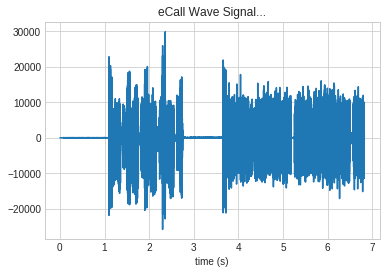

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

spf = wave.open("data/pcmulout1.pcm.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.frombuffer(signal, "Int16")

fs = spf.getframerate()
num= len(signal)
print("fs="+str(fs) + " num="+str(num))

Time = np.linspace(0, len(signal) / fs, num=len(signal))

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files are supported!")
    sys.exit(0)

plt.figure(1)
plt.title("eCall Wave Signal...")
#plt.xticks([8000,16000,24000,32000,40000,48000,56000],[1,2,3,4,5,6,7])
plt.xlabel('time (s)')
plt.plot(Time,signal)
plt.show()


In [ ]:
from IPython.display import Audio

Audio(signal,rate=8000)